In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('abstracts.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3000 non-null   int64 
 1   Title       3000 non-null   object
 2   Abstract    3000 non-null   object
dtypes: int64(1), object(2)
memory usage: 70.4+ KB


In [4]:
df = df.rename(columns={'Unnamed: 0': 'Id'})
df.set_index('Id')

,Title,Abstract
Id,,
0,Interrogating the function of GABA<sub>A</sub>...,To better understand neural circuits and behav...
1,Floralozone improves cognitive impairment in v...,Vascular dementia (VD) is the second largest t...
2,"The effects of Vilazodone, YL-0919 and Vortiox...",Parkinson's disease is a neurodegenerative dis...
3,Deciphering therapeutic options for neurodegen...,Silent information regulator 1 (SIRT1) is a ni...
4,Therapeutic effect of extracellular vesicles f...,Extracellular vesicles (EVs) are biologically ...
...,...,...
2995,Challenges and opportunities in translational ...,"For decades, basic research on the underlying ..."
2996,Growth and Differentiation of Circulating Stem...,Stem cell therapy is gaining momentum as an ef...
2997,Remote Ischemic Postconditioning vs. Physical ...,There remain debates on neuroprotection and re...


In [5]:
# Data preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

documents = df['Abstract'].values.astype("U")

vectorizer = TfidfVectorizer(stop_words='english')
features = vectorizer.fit_transform(documents)

#K-Means

1) Deciding the number of clusters

In [6]:
kmeans_kwargs = {  
        "init": "random",
        "n_init": 10,
        "max_iter": 300,
        "random_state": 42,
    }
   
# A list holds the SSE values for each k
sse = []  # sum of squared error (distances in our case)
for k in range(1, 21):  # we will try clustering data into range(1, 11) clusters
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)  # initiates the k-means algorithm
  kmeans.fit(features)  # fits k-means on our data
  sse.append(kmeans.inertia_)  # Sum of squared distances of samples to their closest cluster center.kl.plot_knee()

In [7]:
 import matplotlib.pyplot as plt

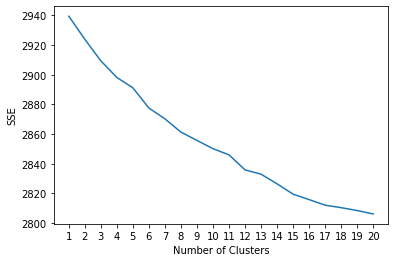

In [8]:
fig, axs = plt.subplots()
plt.plot(range(1, 21), sse)
plt.xticks(range(1, 21))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")

fig.set(facecolor='white')
plt.show()

In [9]:
pip install kneed

In [10]:
from kneed import KneeLocator
import matplotlib.pyplot as plt  # plotting

kl = KneeLocator(
    range(1, 21), sse, curve="convex", direction="decreasing"
    )

print(f'We should use {kl.elbow} clusters.')

We should use 12 clusters.


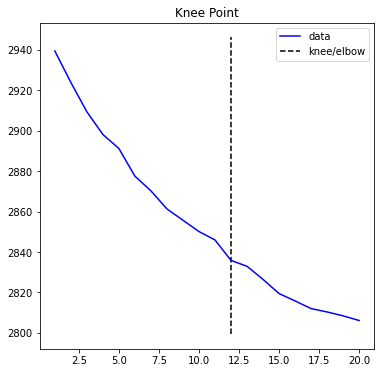

In [11]:
kl.plot_knee()

In [12]:
k = 10
model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
model.fit(features)

KMeans(max_iter=100, n_clusters=10, n_init=1)

In [13]:
df['cluster'] = model.labels_

df.head(20)

,Id,Title,Abstract,cluster
0,0,Interrogating the function of GABA<sub>A</sub>...,To better understand neural circuits and behav...,7
1,1,Floralozone improves cognitive impairment in v...,Vascular dementia (VD) is the second largest t...,0
2,2,"The effects of Vilazodone, YL-0919 and Vortiox...",Parkinson's disease is a neurodegenerative dis...,7
3,3,Deciphering therapeutic options for neurodegen...,Silent information regulator 1 (SIRT1) is a ni...,9
4,4,Therapeutic effect of extracellular vesicles f...,Extracellular vesicles (EVs) are biologically ...,9
5,5,Tauopathies: the role of tau in cellular cross...,Tauopathies are a group of neurodegenerative d...,9
6,6,Chronic neuropathic pain is more than a percep...,The management of chronic neuropathic pain rem...,6
7,7,Preliminary Report on the Train the Brain Proj...,Neuromuscular training (NMT) facilitates the a...,1
8,8,A Neurobiological Framework for the Therapeuti...,Post traumatic stress disorder (PTSD) has emer...,9
9,9,Does Bisphenol A Confer Risk of Neurodevelopme...,Substantial evidence indicates that bisphenol ...,9


In [14]:
# output the result to a text file.

clusters = df.groupby('cluster')    

for cluster in clusters.groups:
    f = open('cluster'+str(cluster)+ '.csv', 'w') # create csv file
    data = clusters.get_group(cluster)[['Id','Abstract']] # get title and overview columns
    f.write(data.to_csv(index_label='Id')) # set index to id
    f.close()

In [15]:
print("Cluster centroids: \n")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(k):
    print("Cluster %d:" % i)
    for j in order_centroids[i, :10]: #print out 10 feature terms of each cluster
        print (' %s' % terms[j])
    print('------------')

Cluster centroids: 

Cluster 0:
 mice
 hippocampal
 memory
 hippocampus
 rats
 synaptic
 cognitive
 expression
 plasticity
 effects
------------
Cluster 1:
 brain
 visual
 motor
 training
 functional
 cortical
 changes
 neural
 auditory
 cognitive
------------
Cluster 2:
 stroke
 recovery
 rehabilitation
 motor
 patients
 post
 ischemic
 functional
 brain
 neuroplasticity
------------
Cluster 3:
 stimulation
 rtms
 transcranial
 tms
 motor
 tdcs
 magnetic
 m1
 vns
 brain
------------
Cluster 4:
 sup
 ca
 synaptic
 mice
 neurons
 plasticity
 neuronal
 sub
 channels
 protein
------------
Cluster 5:
 synaptic
 neurons
 plasticity
 neuronal
 activity
 synapses
 memory
 learning
 receptors
 dependent
------------
Cluster 6:
 pain
 exercise
 chronic
 neuropathic
 patients
 intensity
 physical
 effects
 study
 covid
------------
Cluster 7:
 sub
 gaba
 receptor
 receptors
 rs
 sup
 synaptic
 2a
 ht
 tonic
------------
Cluster 8:
 sci
 spinal
 cord
 injury
 motor
 recovery
 cervical
 stimulatio

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
